In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl # optional (here)
import matplotlib.pyplot as plt
import seaborn as sns # Optional, will only affect the color of bars and the grid

from ipywidgets import widgets, interactive
from io import StringIO


In [30]:
testdata=StringIO("""Year,Sex,Area,Count
2015,W,Dhaka,6
2015,M,Dhaka,3
2015,W,Khulna,1
2015,M,Khulna,8
2014,M,Dhaka,13
2014,W,Dhaka,20
2014,M,Khulna,9
2014,W,Khulna,6
2013,W,Dhaka,11
2013,M,Dhaka,2
2013,W,Khulna,8
2013,M,Khulna,5
2012,M,Dhaka,12
2012,W,Dhaka,4
2012,W,Khulna,7
2012,M,Khulna,1
    """)

df = pd.read_csv(testdata, sep=",")

In [31]:
df.head()

,Year,Sex,Area,Count
0,2015,W,Dhaka,6
1,2015,M,Dhaka,3
2,2015,W,Khulna,1
3,2015,M,Khulna,8
4,2014,M,Dhaka,13


In [32]:
start_year = widgets.BoundedFloatText(
    value=df.Year.min(),
    min=df.Year.min(),
    max=df.Year.max(),
    step=1,
    description='Start Year:',
    disabled=False,
    color='black'
)
end_year = widgets.BoundedFloatText(
    value=df.Year.max(),
    min=df.Year.min(),
    max=df.Year.max(),
    step=1,
    description='End Year:',
    disabled=False,
    color='black'
)

In [36]:
Data_List_2 = ['TOTALPOSSESSIONS', 'CONTESTEDPOSSESSIONS', 'UNCONTESTEDPOSSESSIONS','DISPOSALS', 'DISPOSALEFFICIENCY', 
            'KICKS','HANDBALLS','MARKS', 'CONTESTEDMARKS', 'MARKSINSIDE50', 'TACKLES', 'TACKLESINSIDE50', 
             'CENTRECLEARANCES', 'INSIDE50S','ONEPERCENTERS', 'REBOUND50S','STOPPAGECLEARANCES', 'TOTALCLEARANCES', 
             'CROWD']

In [42]:
# Make a dropdown to select the Area, or "All"
area = widgets.Dropdown(
    options=['All'] + list(df['Area'].unique()),
    #options=['All'] + list(df['Area'].unique()),
    value='All',
    description='Area:',
)

#Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),


In [34]:
def plotit(area,  start_year,end_year ):
    """
    Filters and plot the dataframe as a stacked bar chart of count of Male versus Women

    Args:
    -----
        * area (str): the area to filter on, or "All" to display all Areas

        * start_year, end_year (int, as float): the start and ends years, inclusive

        Note: the dataframe to plot is globally defined here as `df`

    Returns:
    --------
        A matplotlib stacked bar chart


    """
    

    
    if start_year > end_year:
        print("You must select a start year that is prior to end year")
    else:
        df2 = df.copy()
        if area != 'All':
            df2 = df2[df2.Area == area]

        # Filter between min and max years (inclusive)
        df2 = df2[(df2.Year >= start_year) & (df2.Year <= end_year)]


        # Plot it (only if there's data to plot)
        if len(df2) > 0:
            df2.groupby(['Year', 'Sex']).sum()['Count'].unstack().plot(kind='bar', stacked=True, title="Area = {}".format(area))
            plt.show();
        else:
            print("No data to show for current selection")

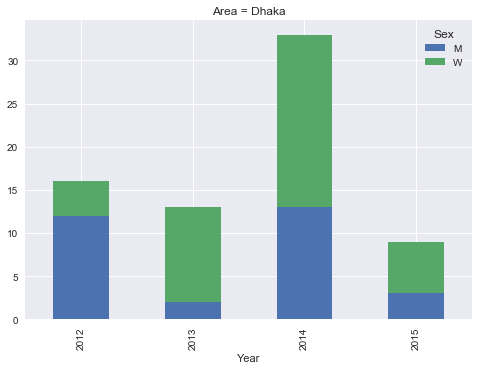

In [35]:
interactive(plotit, area=area, start_year=start_year, end_year=end_year)

In [ ]:
def make_graphfunction(input_data, comparison_data, teamname):  

In [ ]:
Rain_List = ['Rain', 'No_Rain']

Team_List = ['All', 'GWS Giants', 'Port Adelaide', 'Richmond', 'Hawthorn', 'Melbourne',
           'Collingwood', 'St Kilda', 'Gold Coast Suns', 'Carlton',
           'Geelong Cats', 'Western Bulldogs', 'West Coast Eagles',
           'Adelaide Crows', 'North Melbourne', 'Essendon', 'Fremantle',
           'Sydney Swans', 'Brisbane Lions']

Year_List = ['All', '2001', '2002', '2003', '2004, 2005', '2006', '2007', '2008', '2009', '2010', 
             '2011', '2012', '2013', '2014', '2015', '2016', '2017']
Data_List = ['TOTALPOSSESSIONS', 'CONTESTEDPOSSESSIONS', 'UNCONTESTEDPOSSESSIONS','DISPOSALS', 'DISPOSALEFFICIENCY', 
            'KICKS','HANDBALLS','MARKS', 'CONTESTEDMARKS', 'MARKSINSIDE50', 'TACKLES', 'TACKLESINSIDE50', 
             'CENTRECLEARANCES', 'INSIDE50S','ONEPERCENTERS', 'REBOUND50S','STOPPAGECLEARANCES', 'TOTALCLEARANCES', 
             'CROWD']

In [ ]:
input_data = widgets.Dropdown(
    options= Data_List_2,
    value='TOTALPOSSESSIONS',
    description='SORT BY DATATYPE',
)

comparison_data = widgets.Dropdown(
    options=['TIME'] + Data_List,
    value= 'TIME',
    description='COMPARE WITH DATATYPE',
)

teamname = widgets.Dropdown(
    options= Team_List,
    value= 'All',
    description='COMPARE BY TEAM',
)

In [ ]:
interactive(make_graphfunction, input_data=input_data, comparison_data = comparison_data, teamname = teamname)